In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

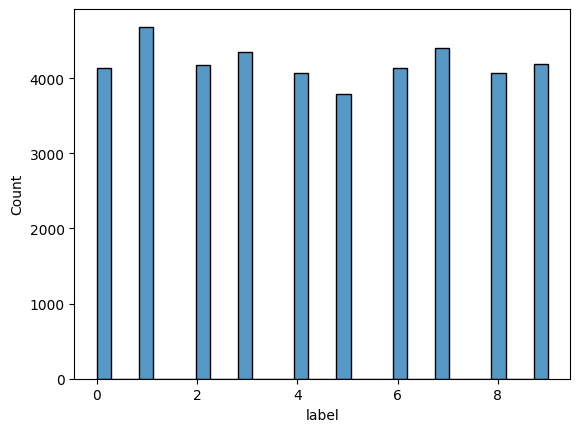

In [5]:
Y_train=train.label
train.drop('label',axis=1,inplace=True)
X_train=train
sns.histplot(Y_train)
Y_train.value_counts()

In [6]:
# na_cols=X_train.columns[X_train.isnull().any()].tolist()
print(f'X_train中缺失值数量为：{X_train.isna().sum().sum()}')
print(f"test中的缺失值数量为：{test.isna().sum().sum()}")

X_train中缺失值数量为：0
test中的缺失值数量为：0


<center>Normalization</center>

In [7]:
X_train.max().sort_values(ascending=False)

pixel723    255
pixel417    255
pixel410    255
pixel411    255
pixel412    255
           ... 
pixel83       0
pixel82       0
pixel57       0
pixel56       0
pixel783      0
Length: 784, dtype: int64

In [8]:
# from sklearn.preprocessing import StandardScaler
# transform=StandardScaler()
# X_train=transform.fit_transform(X_train)
# test=transform.fit_transform(test)
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

<center>Reshape</center>

In [9]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# 训练和测试图像 (28px x 28px) 已作为 784个值的 1D 向量存储到 pandas.Dataframe 中。我们将所有数据重塑为28x28x1 3D 矩阵
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

&emsp;&emsp;Keras 最后需要一个与通道相对应的额外维度。 MNIST 图像是灰度图像，因此仅使用一个通道。对于 RGB 图像，有 3 个通道，我们会将 784px 向量重塑为 28x28x3 3D 矩阵。
<center>Label encoding</center>

In [10]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
# 将对应位置的数字变成1，其余位置的数字变成0
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

<center>Split training and valdiation set</center>

In [11]:
random_seed = 2
# 增加一个验证集
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

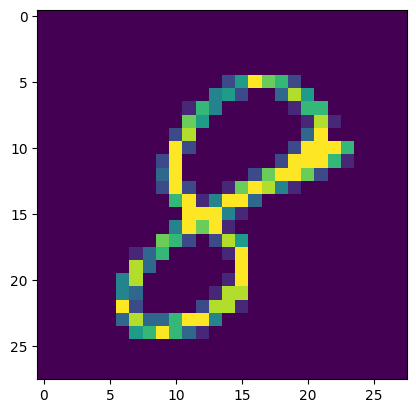

In [12]:
# Some examples
g=plt.imshow(X_train[0][:,:,0])